# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

## Submitted by: Noa Kotler, Nitzan Tal

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm
import matplotlib.image as mpimg

### Read measured data from an Excel file

In [64]:
# Open the file and # Get the first sheet as an object
sheet1 = pd.read_excel('European Measurements.xlsx',engine='openpyxl', sheet_name = 3)

variables = ["Month","Avg. Likes"]
time_series_data = sheet1.loc[:, variables].values
print(time_series_data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [65]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0;
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[5168 4721 1302 8221]
 [4589 6716 2752 1845]
 [1336 2277 2545 6216]
 ...
 [5434 3921   74 9699]
 [4458 9732 2019 9069]
 [5165 1857 5716 1401]]

Evolution:
Generation =  0 	Best fitness =  247183644646.68765
Generation =  1 	Best fitness =  208759719660.28052
Generation =  2 	Best fitness =  92706756417.58469
Generation =  3 	Best fitness =  92706756417.58469
Generation =  4 	Best fitness =  65409705275.33043
Generation =  5 	Best fitness =  65409705275.33043
Generation =  6 	Best fitness =  64877629644.44568
Generation =  7 	Best fitness =  58384877893.41642
Generation =  8 	Best fitness =  54733070454.01073
Generation =  9 	Best fitness =  48740694566.36472
Generation =  10 	Best fitness =  37370703724.48268
Generation =  11 	Best fitness =  37370703724.48268
Generation =  12 	Best fitness =  33772387123.76734
Generation =  13 	Best fitness =  33772387123.76734
Generation =  14 	Best fitness =  32987416116.29784
Generation =  15 	Best fitness 

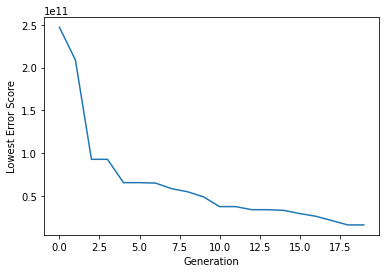

In [67]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(time_series_data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(time_series_data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Lowest Error Score")
plt.show()

## Challenge 231
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

### Let's create a general GA class (we will use it for the next questions as well)
*** 
This GA class receives an initialization function and a fitness function so it can be used for other problems as well. It also includes all the improvements requested in Q1:
1. biased selection calculates probability of a parent: fitness / sum of all fitnesses and uses that to select parents (with replacement)
2. Recombination selects the parents randomly (but makes sure it's they are different) and randomizes a split point on which it creates the offspring. Also added an option for uniform crossover: where every gene/feature is randomly taken from one of the parents.
3. We have a few stopping conditions implmenented:
    - The algorithm reached max number of generations
    - The algorithm achieved a certain error threshold (we will use this in Q2)
    - The algorithm accuracy hasn't changed for X generations (X is passed as the stop_threshold parameter)
4. We also have elite option implemented, which is off by default, but if a number X is passed to the elite parameter, than the best X solutions in each generataion are guaranteed to be a part of the next generation.

- mutation rates and scales and other GA parameters are tested separately later to find the best parameters
***

In [99]:

class GA():

    def __init__(self,
                 data,
                 fitness_function,
                 init_function,
                 number_of_solutions,
                 size_of_solution,
                 number_of_parents,
                 max_generations,
                 var_min = -np.inf,
                 var_max = np.inf,
                 elite=0,
                 uniform_crossover=False,
                 stop_threshold=100,
                 err_threshold=-np.inf):

        self.data = data
        self.fitness_function = fitness_function
        self.init_function = init_function
        self.number_of_solutions = number_of_solutions
        self.size_of_solution = size_of_solution
        self.number_of_parents = number_of_parents
        self.max_generations = max_generations
        self.elite = elite
        self.stop_threshold = stop_threshold
        self.err_threshold = err_threshold
        self.var_min = var_min
        self.var_max = var_max
        self.uniform_crossover = uniform_crossover

    def biased_selection(self, pop, fitness, num_parents):
        ''' select num_parents based on their probabilities: fitness_i / sum ( fitness_i ) '''

        # we want to maximize fitness to minimize the error - higher probabilities for higher fitnesses
        fit_vec = np.array(fitness)
        parents_prob_vec = fit_vec / np.sum(fit_vec)
        parents_ind = np.arange(len(pop))

        # randomly choose num_parents indices according to their probabilities
        chosen_parents_ind = np.random.choice(a=parents_ind, p=parents_prob_vec, size=num_parents, replace=True)

        return pop[chosen_parents_ind, :]

    def recombination(self, parents, offspring_size, uniform_crossover=False):
        ''' choose a random split point and random parents for each offspring and  
            combine parents data to create offsprings '''

        offspring = np.empty(offspring_size)

        for k in range(offspring_size[0]):
            
            # randomly choose two parents
            parents_idx_arr = np.random.choice(a=np.arange(parents.shape[0]), size=2, replace=False)
            parent1_idx = parents_idx_arr[0]
            parent2_idx = parents_idx_arr[1]

            if uniform_crossover:
                # choose each gene randomly choose from one of the parents
                parent_mask = np.random.randint(0, 2, self.size_of_solution)
                offspring[k, parent_mask] = parents[parent1_idx, parent_mask]
                offspring[k, ~parent_mask] = parents[parent2_idx, ~parent_mask]
            else:
                # randomize the ecombination point (start from 1 to ensure recombination)
                recombination_point = np.random.randint(1, offspring_size[1], size=1)[0] 

                offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
                offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]

        return offspring

    def mutation(self, offspring_recombination, mutation_rate, mutation_scale):
        ''' create a random mutation based on rate and scale: 
            mutation rate is in range [0,1]: 0 will change nothing, 1 will change all genes'''

        for idx in range(offspring_recombination.shape[0]):
            rand = np.random.rand(offspring_recombination.shape[1])
            mask_mutate = rand <= mutation_rate
            ind_to_mutate = np.argwhere(mask_mutate)
            random_values = np.random.randint(-mutation_scale, mutation_scale, len(ind_to_mutate))
            random_values = random_values.reshape(-1, 1)

            offspring_recombination[idx, ind_to_mutate] += random_values

            # make sure the mutation has valid values
            if self.var_min > -np.inf or self.var_max < np.inf:
                offspring_recombination[idx, ind_to_mutate] = np.clip(offspring_recombination[idx, ind_to_mutate], self.var_min, self.var_max)

        return offspring_recombination

    
    def run(self, mutation_rate, mutation_scale, verbose=True, plot=True):
        ''' Run the genetic algorithm with the given parameters'''

        t0 = time()
        print(f'Running GA: rate = {mutation_rate}, scale = {mutation_scale}, solutions = {self.number_of_solutions}, parents = {self.number_of_parents}, elite = {self.elite}, max generations = {self.max_generations}')

        print_interval = int(self.max_generations * 0.05)

        best_outputs = []
        no_change_counter = 0

        # Genesis
        new_population = self.init_function((self.number_of_solutions, self.size_of_solution), self.data)
        if verbose:
            print("The population of the first generation: ")
            print(new_population)

        lowest_error_so_far = np.inf
        epsilon = np.finfo(float).eps

        # Evolution
        if verbose:
            print("\nEvolution:")

        for generation in range(self.max_generations):

            fitness = self.fitness_function(self.data, new_population)

            # fitness is 1/error, so we want to maximize fitness, meaning minimize 1 / fitness ( = error)
            lowest_error_in_gen = round(1 / np.max(fitness), 5)

            if verbose and generation % print_interval == 0:
                print(f"Generation = {generation} \tLowest error {lowest_error_in_gen:.3f}, highest fitness = {np.max(fitness):.3f}")

            best_outputs.append(lowest_error_in_gen)

            if lowest_error_in_gen <= self.err_threshold:
                print(f'Reached desired error {self.err_threshold}, stopping at generation {generation}.')
                break

            if len(best_outputs) > 1:
                if best_outputs[-1] == best_outputs[-2]:  # no change in this generation
                    no_change_counter += 1
                else:
                    no_change_counter = 0  # reset counter

            if no_change_counter >= self.stop_threshold:
                print(f'{no_change_counter} generations without change. Stopping at generation {generation}')
                break

            # select parents
            if self.elite == 0:
                selected_parents = self.biased_selection(new_population, fitness, self.number_of_parents)

            else:  # select parents using elite - take best X (self.elite) and the other based on biased selection

                selected_parents = np.zeros(shape=(self.number_of_parents, self.size_of_solution))  # init

                sorted_fitness_args = np.argsort(fitness)
                selected_parents[:self.elite, :] = new_population[sorted_fitness_args[-self.elite:], :]

                selected_parents[self.elite:, :] = self.biased_selection(new_population, fitness,
                                                                         self.number_of_parents - self.elite)

            # cross over
            num_of_kids = self.number_of_solutions - self.number_of_parents
            offspring_recombination = self.recombination(selected_parents,
                                                         offspring_size=(num_of_kids, self.size_of_solution))
            # mutation
            offspring_mutation = self.mutation(offspring_recombination, mutation_rate, mutation_scale)

            # add selected parents and offsprings to the new population for the next generation
            new_population[0:self.number_of_parents, :] = selected_parents
            new_population[self.number_of_parents:, :] = offspring_mutation

        # Results
        if verbose:
            print("\nThe population of the last generation: ")
            print(new_population)

        fitness = self.fitness_function(self.data, new_population)
        best_fitness_in_last_gen = np.max(fitness)
        best_match_idx = np.where(fitness == best_fitness_in_last_gen)
        lowest_err_last_gen = 1 / best_fitness_in_last_gen
        best_solution = new_population[best_match_idx[0][0], :]

        if verbose:
            print(best_match_idx[0][0])
            print("Best solution: ", best_solution)

        if plot:
            plt.semilogy(best_outputs)
            plt.xlabel("Generation")
            plt.ylabel("Error")
            plt.show()

        print(f'GA took {time() - t0:.3f} sec to run')
        return best_fitness_in_last_gen, lowest_err_last_gen, generation, best_solution

    def run_with_different_mutations_params(self, rates, scales, num_runs, verbose=False, plot=False):

        results = {}

        for rate in rates:
            for scale in scales:
                best_solution, lowest_err = self.run_multiple_times(rate, scale, num_runs, verbose, plot)
                print(f'rate {rate}, scale {scale}: best solution {best_solution}, err = {lowest_err:.3f}')
                results[(rate, scale)] = [best_solution, lowest_err]

        # print results
        for k, v in results.items():
            print(k, ':', v)

        # return best result
        best_rate, best_scale = sorted(results.items(), key=lambda x: x[1][1])[0][0]
        best_result = sorted(results.items(), key=lambda x: x[1][1])[0][1][0]

        print('best results:\n', best_rate, best_scale, best_result)
        return best_rate, best_scale, best_result

    def run_with_different_population_params(self, rate, scale, ratio_of_parents, num_solutions, num_runs,
                                             verbose=False, plot=False):

        results = {}
        original_parents = self.number_of_parents
        original_solution = self.number_of_solutions

        for num_sol in tqdm(num_solutions):
            for ratio in tqdm(ratio_of_parents):
#                 print(f'Running GA with {num_sol} solutions, {ratio} of it are parents ')
                self.number_of_parents = int(num_sol * ratio)
                self.number_of_solutions = num_sol
                best_solution, lowest_err = self.run_multiple_times(rate, scale, num_runs, verbose, plot)
                print(
                    f'ratio parents {ratio}, number_of_solutions {num_sol}: best solution {best_solution}, err = {lowest_err:.3f}')
                results[(ratio, num_sol)] = [best_solution, lowest_err]

        # print results
        for k, v in results.items():
            print(k, ':', v)

        # return best result
        best_parent_num, best_sol_num = sorted(results.items(), key=lambda x: x[1][1])[0][0]
        best_result = sorted(results.items(), key=lambda x: x[1][1])[0][1][0]

        # restore original values
        self.number_of_parents = original_parents
        self.number_of_solutions = original_solution

        print('best results:\n', best_parent_num, best_sol_num, best_result)
        return best_parent_num, best_sol_num, best_result

    def run_multiple_times(self, rate, scale, num_runs, verbose=False, plot=False):
        # Run GA multiple times and return best solution

        error_vec = []
        generation_vec = []
        best_solution_vec = []

        for i in tqdm(range(num_runs)):
            best_fitness, lowest_err, generation, best_solution = self.run(rate, scale, verbose, plot)
            print(f'run {i}: best fitness {best_fitness:.6f}, lowest error {lowest_err:.2f} ')
            error_vec.append(lowest_err)
            generation_vec.append(generation)
            best_solution_vec.append(best_solution)

        print('*' * 60)
        lowest_errors_all_runs = np.min(error_vec)
        best_solution_all_runs = best_solution_vec[np.argmin(error_vec)]
        print(f'best solution = {best_solution}')
        print('*' * 60)

        return best_solution_all_runs, lowest_errors_all_runs



#### Q1

In [110]:

def init_function_q1(population_size, data): # data is not being used, just for compatability with other init functions
    return np.random.randint(low=0, high=10000, size=population_size)


def fitness_function_q1(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0] * event_time ** 3 + pop[solution][1] * event_time ** 2 + \
                             pop[solution][
                                 2] * event_time + pop[solution][3]
            error += (event_expected - event_measured) ** 2
        fitness.append(
            1 / error)  # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

# GA parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
number_of_generations = 20

genetic_algorithm_q1 = GA(data=time_series_data,
                          fitness_function=fitness_function_q1,
                          init_function=init_function_q1,
                          number_of_solutions=number_of_solutions,
                          size_of_solution=formula_degree,
                          number_of_parents=number_of_parents,
                          max_generations=number_of_generations)


In [111]:
# try different mutation rates and scales
mutation_rates = [0.25, 0.5]
mutation_scales = [100, 250, 500, 1000]

best_rate_q1, best_scale_q1, _ = genetic_algorithm_q1.run_with_different_mutations_params(mutation_rates, mutation_scales, 3)


  0%|          | 0/3 [00:00<?, ?it/s]

Running GA: rate = 0.25, scale = 100, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.30s/it]

GA took 3.299 sec to run
run 0: best fitness 0.000000, lowest error 415306352.84 
Running GA: rate = 0.25, scale = 100, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.30s/it]

GA took 3.305 sec to run
run 1: best fitness 0.000000, lowest error 180381875.30 
Running GA: rate = 0.25, scale = 100, solutions = 500, parents = 250, elite = 0, max generations = 20


  0%|          | 0/3 [00:00<?, ?it/s]

GA took 3.302 sec to run
run 2: best fitness 0.000000, lowest error 87805513.43 
************************************************************
best solution = [  -2   34  527 4759]
************************************************************
rate 0.25, scale 100: best solution [  -2   34  527 4759], err = 87805513.435
Running GA: rate = 0.25, scale = 250, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.30s/it]

GA took 3.297 sec to run
run 0: best fitness 0.000000, lowest error 289584606.31 
Running GA: rate = 0.25, scale = 250, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.31s/it]

GA took 3.337 sec to run
run 1: best fitness 0.000000, lowest error 25529529.59 
Running GA: rate = 0.25, scale = 250, solutions = 500, parents = 250, elite = 0, max generations = 20


  0%|          | 0/3 [00:00<?, ?it/s]

GA took 3.276 sec to run
run 2: best fitness 0.000000, lowest error 2152525506.51 
************************************************************
best solution = [ -42   -5 3711 9440]
************************************************************
rate 0.25, scale 250: best solution [   3   -2  156 6697], err = 25529529.586
Running GA: rate = 0.25, scale = 500, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.41s/it]

GA took 3.414 sec to run
run 0: best fitness 0.000000, lowest error 651337957.96 
Running GA: rate = 0.25, scale = 500, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.41s/it]

GA took 3.402 sec to run
run 1: best fitness 0.000000, lowest error 13993255.29 
Running GA: rate = 0.25, scale = 500, solutions = 500, parents = 250, elite = 0, max generations = 20


  0%|          | 0/3 [00:00<?, ?it/s]

GA took 3.333 sec to run
run 2: best fitness 0.000000, lowest error 241040714.25 
************************************************************
best solution = [ -13    9 1108 6225]
************************************************************
rate 0.25, scale 500: best solution [   4   25   89 5725], err = 13993255.293
Running GA: rate = 0.25, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.33s/it]

GA took 3.332 sec to run
run 0: best fitness 0.000000, lowest error 27312297.17 
Running GA: rate = 0.25, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.35s/it]

GA took 3.378 sec to run
run 1: best fitness 0.000000, lowest error 12279443.73 
Running GA: rate = 0.25, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20


  0%|          | 0/3 [00:00<?, ?it/s]

GA took 3.287 sec to run
run 2: best fitness 0.000000, lowest error 26625806.28 
************************************************************
best solution = [   2    1  256 6581]
************************************************************
rate 0.25, scale 1000: best solution [   5    7   41 6178], err = 12279443.732
Running GA: rate = 0.5, scale = 100, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.39s/it]

GA took 3.391 sec to run
run 0: best fitness 0.000000, lowest error 1074015016.02 
Running GA: rate = 0.5, scale = 100, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.38s/it]

GA took 3.362 sec to run
run 1: best fitness 0.000000, lowest error 5656845033.83 
Running GA: rate = 0.5, scale = 100, solutions = 500, parents = 250, elite = 0, max generations = 20


  0%|          | 0/3 [00:00<?, ?it/s]

GA took 3.359 sec to run
run 2: best fitness 0.000000, lowest error 33046974.12 
************************************************************
best solution = [   3   25  106 5151]
************************************************************
rate 0.5, scale 100: best solution [   3   25  106 5151], err = 33046974.118
Running GA: rate = 0.5, scale = 250, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.37s/it]

GA took 3.367 sec to run
run 0: best fitness 0.000000, lowest error 1364897306.95 
Running GA: rate = 0.5, scale = 250, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.38s/it]

GA took 3.398 sec to run
run 1: best fitness 0.000000, lowest error 2670728249.77 
Running GA: rate = 0.5, scale = 250, solutions = 500, parents = 250, elite = 0, max generations = 20


  0%|          | 0/3 [00:00<?, ?it/s]

GA took 3.386 sec to run
run 2: best fitness 0.000000, lowest error 22334882.20 
************************************************************
best solution = [   3    1  138 6464]
************************************************************
rate 0.5, scale 250: best solution [   3    1  138 6464], err = 22334882.198
Running GA: rate = 0.5, scale = 500, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.32s/it]

GA took 3.321 sec to run
run 0: best fitness 0.000000, lowest error 3110946649.77 
Running GA: rate = 0.5, scale = 500, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.32s/it]

GA took 3.305 sec to run
run 1: best fitness 0.000000, lowest error 15494141.06 
Running GA: rate = 0.5, scale = 500, solutions = 500, parents = 250, elite = 0, max generations = 20


  0%|          | 0/3 [00:00<?, ?it/s]

GA took 3.290 sec to run
run 2: best fitness 0.000000, lowest error 1402765580.99 
************************************************************
best solution = [ -26   54 2758 6345]
************************************************************
rate 0.5, scale 500: best solution [   3   16  183 5892], err = 15494141.056
Running GA: rate = 0.5, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20


 33%|███▎      | 1/3 [00:03<00:06,  3.33s/it]

GA took 3.330 sec to run
run 0: best fitness 0.000000, lowest error 75914564.51 
Running GA: rate = 0.5, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20


 67%|██████▋   | 2/3 [00:06<00:03,  3.34s/it]

GA took 3.368 sec to run
run 1: best fitness 0.000000, lowest error 446819875.32 
Running GA: rate = 0.5, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20


100%|██████████| 3/3 [00:10<00:00,  3.34s/it]

GA took 3.306 sec to run
run 2: best fitness 0.000000, lowest error 64446603.99 
************************************************************
best solution = [   1    0  269 7495]
************************************************************
rate 0.5, scale 1000: best solution [   1    0  269 7495], err = 64446603.994
(0.25, 100) : [array([  -2,   34,  527, 4759]), 87805513.43454307]
(0.25, 250) : [array([   3,   -2,  156, 6697]), 25529529.586098813]
(0.25, 500) : [array([   4,   25,   89, 5725]), 13993255.293199223]
(0.25, 1000) : [array([   5,    7,   41, 6178]), 12279443.731962807]
(0.5, 100) : [array([   3,   25,  106, 5151]), 33046974.11830496]
(0.5, 250) : [array([   3,    1,  138, 6464]), 22334882.197937973]
(0.5, 500) : [array([   3,   16,  183, 5892]), 15494141.05600792]
(0.5, 1000) : [array([   1,    0,  269, 7495]), 64446603.994273864]
best results:
 0.25 1000 [   5    7   41 6178]


***

We can see that the best solution achieved is starting to get close to the actual solution and the error is decreasing. Let's use the best parameters found and try to improve accuracy by changing number of parents and number of solutions

***

In [112]:
# try different ratio of parents and population sizes

ratio_of_parents = [0.25, 0.5]
number_of_solutions = [100, 500, 1000]

best_parent_ratio_q1, best_sol_num_q1, _ = genetic_algorithm_q1.run_with_different_population_params(best_rate_q1, best_scale_q1, ratio_of_parents, number_of_solutions, 2)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running GA: rate = 0.25, scale = 1000, solutions = 100, parents = 25, elite = 0, max generations = 20




 50%|█████     | 1/2 [00:00<00:00,  1.40it/s]

GA took 0.717 sec to run
run 0: best fitness 0.000000, lowest error 107798533.45 
Running GA: rate = 0.25, scale = 1000, solutions = 100, parents = 25, elite = 0, max generations = 20




100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

 50%|█████     | 1/2 [00:01<00:01,  1.42s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 0.703 sec to run
run 1: best fitness 0.000000, lowest error 1594754805.21 
************************************************************
best solution = [ -36   20 3292 6405]
************************************************************
ratio parents 0.25, number_of_solutions 100: best solution [  -4  -17  645 7057], err = 107798533.454
Running GA: rate = 0.25, scale = 1000, solutions = 100, parents = 50, elite = 0, max generations = 20




 50%|█████     | 1/2 [00:00<00:00,  1.46it/s]

GA took 0.686 sec to run
run 0: best fitness 0.000000, lowest error 2689717664.66 
Running GA: rate = 0.25, scale = 1000, solutions = 100, parents = 50, elite = 0, max generations = 20




100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 0.675 sec to run
run 1: best fitness 0.000000, lowest error 3407732618.64 
************************************************************
best solution = [ -59   12 4099 2561]
************************************************************
ratio parents 0.5, number_of_solutions 100: best solution [ -59   23 4120 6024], err = 2689717664.662
Running GA: rate = 0.25, scale = 1000, solutions = 500, parents = 125, elite = 0, max generations = 20




 50%|█████     | 1/2 [00:03<00:03,  3.53s/it]

GA took 3.527 sec to run
run 0: best fitness 0.000000, lowest error 10852223.59 
Running GA: rate = 0.25, scale = 1000, solutions = 500, parents = 125, elite = 0, max generations = 20




100%|██████████| 2/2 [00:07<00:00,  3.51s/it]

 50%|█████     | 1/2 [00:07<00:07,  7.03s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 3.494 sec to run
run 1: best fitness 0.000000, lowest error 15243046.97 
************************************************************
best solution = [   3   10  166 6168]
************************************************************
ratio parents 0.25, number_of_solutions 500: best solution [   6   23  -32 5781], err = 10852223.588
Running GA: rate = 0.25, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20




 50%|█████     | 1/2 [00:03<00:03,  3.42s/it]

GA took 3.419 sec to run
run 0: best fitness 0.000000, lowest error 23515386.18 
Running GA: rate = 0.25, scale = 1000, solutions = 500, parents = 250, elite = 0, max generations = 20




100%|██████████| 2/2 [00:06<00:00,  3.37s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 3.317 sec to run
run 1: best fitness 0.000000, lowest error 2161560381.88 
************************************************************
best solution = [ -50   75 3339 3814]
************************************************************
ratio parents 0.5, number_of_solutions 500: best solution [   7    2   -4 6519], err = 23515386.183
Running GA: rate = 0.25, scale = 1000, solutions = 1000, parents = 250, elite = 0, max generations = 20




 50%|█████     | 1/2 [00:06<00:06,  6.92s/it]

GA took 6.919 sec to run
run 0: best fitness 0.000000, lowest error 12085225.15 
Running GA: rate = 0.25, scale = 1000, solutions = 1000, parents = 250, elite = 0, max generations = 20




100%|██████████| 2/2 [00:13<00:00,  6.87s/it]

 50%|█████     | 1/2 [00:13<00:13, 13.75s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 6.825 sec to run
run 1: best fitness 0.000000, lowest error 30836929.06 
************************************************************
best solution = [   2   31  264 5827]
************************************************************
ratio parents 0.25, number_of_solutions 1000: best solution [   8   16 -164 5916], err = 12085225.149
Running GA: rate = 0.25, scale = 1000, solutions = 1000, parents = 500, elite = 0, max generations = 20




 50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

GA took 6.741 sec to run
run 0: best fitness 0.000000, lowest error 28040444.09 
Running GA: rate = 0.25, scale = 1000, solutions = 1000, parents = 500, elite = 0, max generations = 20




100%|██████████| 2/2 [00:13<00:00,  6.80s/it]

100%|██████████| 3/3 [00:43<00:00, 14.64s/it]

GA took 6.849 sec to run
run 1: best fitness 0.000000, lowest error 10425764.71 
************************************************************
best solution = [   7   12  -82 6067]
************************************************************
ratio parents 0.5, number_of_solutions 1000: best solution [   7   12  -82 6067], err = 10425764.711
(0.25, 100) : [array([  -4,  -17,  645, 7057]), 107798533.45431605]
(0.5, 100) : [array([ -59,   23, 4120, 6024]), 2689717664.662485]
(0.25, 500) : [array([   6,   23,  -32, 5781]), 10852223.58773997]
(0.5, 500) : [array([   7,    2,   -4, 6519]), 23515386.182606254]
(0.25, 1000) : [array([   8,   16, -164, 5916]), 12085225.149208559]
(0.5, 1000) : [array([   7,   12,  -82, 6067]), 10425764.71146229]
best results:
 0.5 1000 [   7   12  -82 6067]


***
Let's use all the best parameters we found so far
***

Running GA: rate = 0.25, scale = 1000, solutions = 1000, parents = 500, elite = 0, max generations = 20
The population of the first generation: 
[[4278  182 6169   31]
 [5385 1017 6712 2635]
 [4159 1301 4566 4333]
 ...
 [2861  874 8760 8772]
 [9792 6292 8647 5087]
 [8453  490 7516 1962]]

Evolution:
Generation = 0 	Lowest error 61308471691.980, highest fitness = 0.000
Generation = 1 	Lowest error 21631881732.061, highest fitness = 0.000
Generation = 2 	Lowest error 7739224586.315, highest fitness = 0.000
Generation = 3 	Lowest error 2687805199.641, highest fitness = 0.000
Generation = 4 	Lowest error 1130551837.703, highest fitness = 0.000
Generation = 5 	Lowest error 342425016.024, highest fitness = 0.000
Generation = 6 	Lowest error 240275837.817, highest fitness = 0.000
Generation = 7 	Lowest error 42865279.939, highest fitness = 0.000
Generation = 8 	Lowest error 18297043.773, highest fitness = 0.000
Generation = 9 	Lowest error 15083211.938, highest fitness = 0.000
Generation = 10

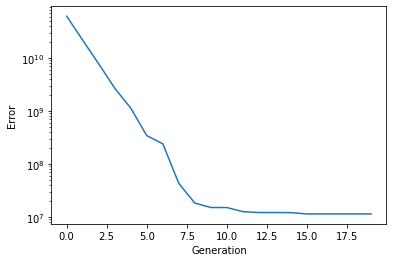

GA took 7.219 sec to run


(8.754793660480481e-08,
 11422313.749255376,
 19,
 array([   4,   13,  101, 6160]))

In [114]:
# use best params so far 
genetic_algorithm_q1.number_of_solutions = best_sol_num_q1
genetic_algorithm_q1.number_of_parents = int(best_parent_ratio_q1 * best_sol_num_q1)

# run algorithm using best params so far
genetic_algorithm_q1.run(best_rate_q1, best_scale_q1)


***
original fitness at generation 19 was 15,956,843,971 and now the fitness is 11,422,313. So we improved the original GA. Let's increase the number of generations to achieve better accuracy.
***

Running GA: rate = 0.25, scale = 1000, solutions = 1000, parents = 500, elite = 0, max generations = 200
The population of the first generation: 
[[4873 4652 4413 3177]
 [5873 8528 6372 4920]
 [1995 3210 2011 7511]
 ...
 [6011 4389 6200 2573]
 [7179  618 5652 9858]
 [8189 7655 3704 1011]]

Evolution:
Generation = 0 	Lowest error 51097702994.910, highest fitness = 0.000
Generation = 10 	Lowest error 13765984.290, highest fitness = 0.000
Generation = 20 	Lowest error 13197195.271, highest fitness = 0.000
Generation = 30 	Lowest error 11093162.771, highest fitness = 0.000
Generation = 40 	Lowest error 10547668.849, highest fitness = 0.000
Generation = 50 	Lowest error 10505629.527, highest fitness = 0.000
Generation = 60 	Lowest error 10345910.689, highest fitness = 0.000
Generation = 70 	Lowest error 9873138.934, highest fitness = 0.000
Generation = 80 	Lowest error 9873138.934, highest fitness = 0.000
Generation = 90 	Lowest error 9862070.606, highest fitness = 0.000
Generation = 100 	L

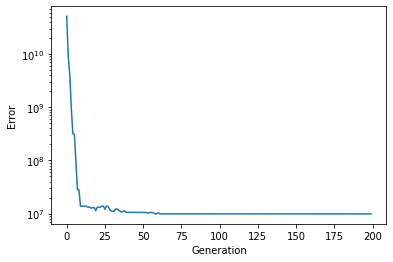

GA took 64.822 sec to run


(1.0903386242801967e-07,
 9171462.67894678,
 199,
 array([   6,   16,  -22, 5952]))

In [115]:
# use best params so far and try increasing the number of generations
genetic_algorithm_q1.max_generations = 200
genetic_algorithm_q1.stop_threshold = 30  # iterations without change as stopping criteria
genetic_algorithm_q1.number_of_solutions = best_sol_num_q1
genetic_algorithm_q1.number_of_parents = int(best_parent_ratio_q1 * best_sol_num_q1)


# run algorithm using best params so far
genetic_algorithm_q1.run(best_rate_q1, best_scale_q1)


***
Increasing the max generations improves our accuracy (fitness is now 9,171,462).
***

#### real results
4.8, 12.1, 53.2 , 6219

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

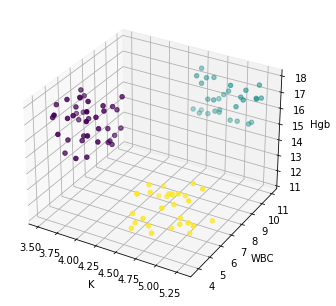

In [20]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import calinski_harabasz_score


# Open the file and # Get the first sheet as an object
sheet1 = pd.read_excel('EMR-Blood.xlsx',engine='openpyxl')
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Challenge 232
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [26]:
def init_function_clustering(population_size, data):
    
    new_population = np.zeros(shape=population_size)
    initial_max_k = int(np.sqrt(data.shape[0] / 2))  # empirical guess of max k

    # initialize the population with different k's
    sub_size = int(population_size[0] / (initial_max_k - 1))
    sub_pop_size = (sub_size, size_of_solution)

    for k in range(2, initial_max_k + 1):
        start = sub_size * (k - 2)
        end = sub_size * (k - 1)
        new_population[start:end, :] = np.random.randint(low=0, high=k, size=sub_pop_size)

    return new_population


def fitness_function_clustering(data, pop):
    fitness = []
    for solution in range(len(pop)):
        ch_index = calinski_harabasz_score(data, pop[solution])
        fitness.append(ch_index)
    return fitness


***

We will use the calinski harabasz score as fitness as it optimizes wcss to bcss ratio. 
For initialization, we will use a hueristic that says that the best k is sqare root of N/2 and initialize the new population evenly with 2, 3, 4, ... k clusters. The algorithm should converge to the correct number of clusters, whether it's higher or lower than k.


***

In [37]:
# GA Parameters
size_of_solution = EMR3d1.shape[0]
number_of_solutions = 600
number_of_parents = 300
number_of_generations = 2000

genetic_algorithm_q2 = GA(data=EMR3d1,
                          fitness_function=fitness_function_clustering,
                          init_function=init_function_clustering,
                          number_of_solutions=number_of_solutions,
                          size_of_solution=size_of_solution,
                          number_of_parents=number_of_parents,
                          max_generations=number_of_generations,
                          stop_threshold=200,
                          var_min=0,
                          err_threshold=0.003)

***
Let's try different combinations of mutation rates and scales.
***

  0%|          | 0/2 [00:00<?, ?it/s]

Running GA... rate = 0.05, scale = 2


 50%|█████     | 1/2 [02:56<02:56, 176.46s/it]

Reached desired error, stopping at generation 1136.
GA took 176.462 sec to run
run 0: best fitness 251.753581, lowest error 0.00 
Running GA... rate = 0.05, scale = 2


  0%|          | 0/2 [00:00<?, ?it/s]

Reached desired error, stopping at generation 1057.
GA took 165.299 sec to run
run 1: best fitness 251.866677, lowest error 0.00 
************************************************************
rate = 0.05, scale = 2
best solution for this rate and scale = [2. 0. 1. 2. 0. 1. 2. 0. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2.
 0. 0. 2. 0. 1. 0. 2. 0. 1. 2. 0. 0. 2. 0. 1. 0. 2. 0. 1. 2. 0. 1. 2. 0.
 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0.
 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 0. 2. 0. 1. 2. 0. 0.
 2. 0. 1. 1.]
************************************************************
rate 0.05, scale 2: best solution [2. 0. 1. 2. 0. 1. 2. 0. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2.
 0. 0. 2. 0. 1. 0. 2. 0. 1. 2. 0. 0. 2. 0. 1. 0. 2. 0. 1. 2. 0. 1. 2. 0.
 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0.
 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 0. 2. 0. 1. 2. 0. 0.
 2. 0. 1. 1.], err = 0.004
Running GA... rate = 0.05,

 50%|█████     | 1/2 [04:50<04:50, 290.48s/it]

GA took 290.483 sec to run
run 0: best fitness 70.303506, lowest error 0.01 
Running GA... rate = 0.05, scale = 3


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 344.083 sec to run
run 1: best fitness 200.998581, lowest error 0.00 
************************************************************
rate = 0.05, scale = 3
best solution for this rate and scale = [1. 2. 0. 1. 3. 0. 1. 2. 2. 0. 1. 3. 0. 1. 2. 0. 1. 3. 0. 0. 1. 3. 0. 1.
 2. 0. 1. 2. 0. 0. 1. 3. 0. 1. 3. 0. 1. 3. 0. 0. 1. 3. 0. 1. 3. 0. 1. 2.
 0. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 0. 1. 2.
 0. 1. 3. 0. 1. 3. 0. 0. 1. 2. 0. 1. 3. 0. 1. 2. 0. 0. 1. 3. 0. 1. 2. 0.
 1. 2. 0. 0.]
************************************************************
rate 0.05, scale 3: best solution [1. 2. 0. 1. 3. 0. 1. 2. 2. 0. 1. 3. 0. 1. 2. 0. 1. 3. 0. 0. 1. 3. 0. 1.
 2. 0. 1. 2. 0. 0. 1. 3. 0. 1. 3. 0. 1. 3. 0. 0. 1. 3. 0. 1. 3. 0. 1. 2.
 0. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 0. 1. 2.
 0. 1. 3. 0. 1. 3. 0. 0. 1. 2. 0. 1. 3. 0. 1. 2. 0. 0. 1. 3. 0. 1. 2. 0.
 1. 2. 0. 0.], err = 0.005
Running GA... rate = 0.1, scale = 2


 50%|█████     | 1/2 [05:12<05:12, 312.16s/it]

GA took 312.162 sec to run
run 0: best fitness 82.337908, lowest error 0.01 
Running GA... rate = 0.1, scale = 2


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 319.043 sec to run
run 1: best fitness 112.719418, lowest error 0.01 
************************************************************
rate = 0.1, scale = 2
best solution for this rate and scale = [0. 2. 1. 0. 2. 1. 0. 2. 1. 1. 0. 2. 1. 0. 2. 1. 0. 1. 1. 0. 0. 2. 1. 0.
 2. 1. 0. 2. 1. 1. 0. 2. 0. 0. 2. 2. 0. 2. 1. 1. 0. 2. 1. 0. 2. 2. 0. 2.
 1. 1. 0. 1. 0. 0. 2. 1. 0. 2. 0. 0. 0. 2. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.
 1. 0. 2. 1. 0. 1. 0. 1. 0. 2. 1. 0. 2. 0. 0. 2. 2. 2. 0. 2. 0. 0. 2. 1.
 0. 2. 1. 1.]
************************************************************
rate 0.1, scale 2: best solution [0. 2. 1. 0. 2. 1. 0. 2. 1. 1. 0. 2. 1. 0. 2. 1. 0. 1. 1. 0. 0. 2. 1. 0.
 2. 1. 0. 2. 1. 1. 0. 2. 0. 0. 2. 2. 0. 2. 1. 1. 0. 2. 1. 0. 2. 2. 0. 2.
 1. 1. 0. 1. 0. 0. 2. 1. 0. 2. 0. 0. 0. 2. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.
 1. 0. 2. 1. 0. 1. 0. 1. 0. 2. 1. 0. 2. 0. 0. 2. 2. 2. 0. 2. 0. 0. 2. 1.
 0. 2. 1. 1.], err = 0.009
Running GA... rate = 0.1, scale = 3


 50%|█████     | 1/2 [05:16<05:16, 316.81s/it]

GA took 316.805 sec to run
run 0: best fitness 74.832201, lowest error 0.01 
Running GA... rate = 0.1, scale = 3


  0%|          | 0/2 [00:00<?, ?it/s]

100 generations without change. Stopping at generation 1387
GA took 206.436 sec to run
run 1: best fitness 142.398935, lowest error 0.01 
************************************************************
rate = 0.1, scale = 3
best solution for this rate and scale = [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0.]
************************************************************
rate 0.1, scale 3: best solution [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0.], err = 0.007
Running GA... rate =

 50%|█████     | 1/2 [03:00<03:00, 180.10s/it]

100 generations without change. Stopping at generation 1167
GA took 180.099 sec to run
run 0: best fitness 66.006197, lowest error 0.02 
Running GA... rate = 0.15, scale = 2


  0%|          | 0/2 [00:00<?, ?it/s]

100 generations without change. Stopping at generation 575
GA took 90.916 sec to run
run 1: best fitness 64.396590, lowest error 0.02 
************************************************************
rate = 0.15, scale = 2
best solution for this rate and scale = [2. 0. 0. 2. 0. 0. 2. 0. 0. 0. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 2. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 2. 0. 0. 1. 0. 0. 2. 0. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0.
 0. 0. 2. 0. 0. 2. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 2. 0.
 0. 2. 0. 1. 2. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 2. 0. 0.
 2. 0. 0. 0.]
************************************************************
rate 0.15, scale 2: best solution [1. 2. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 2. 1.
 0. 0. 1. 2. 0. 0. 1. 2. 0. 1. 2. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 2.
 2. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0.], err = 0.015
Running GA... rate = 

 50%|█████     | 1/2 [05:36<05:36, 337.00s/it]

100 generations without change. Stopping at generation 1906
GA took 336.997 sec to run
run 0: best fitness 65.856000, lowest error 0.02 
Running GA... rate = 0.15, scale = 3


100%|██████████| 2/2 [12:02<00:00, 361.15s/it]

GA took 385.311 sec to run
run 1: best fitness 50.453629, lowest error 0.02 
************************************************************
rate = 0.15, scale = 3
best solution for this rate and scale = [0. 4. 3. 0. 1. 3. 0. 3. 3. 3. 0. 2. 3. 0. 1. 1. 0. 2. 1. 3. 0. 2. 1. 0.
 4. 2. 0. 4. 2. 2. 0. 1. 3. 0. 1. 3. 0. 1. 3. 3. 0. 4. 2. 0. 1. 2. 0. 1.
 2. 3. 0. 1. 2. 0. 1. 2. 0. 1. 0. 0. 0. 4. 2. 0. 1. 4. 0. 1. 3. 1. 0. 4.
 3. 0. 4. 2. 0. 1. 2. 3. 0. 1. 1. 0. 1. 2. 0. 4. 3. 1. 0. 4. 0. 0. 3. 3.
 0. 4. 3. 3.]
************************************************************
rate 0.15, scale 3: best solution [2. 1. 0. 2. 0. 0. 2. 1. 0. 0. 2. 0. 0. 2. 3. 0. 2. 1. 0. 1. 2. 1. 0. 2.
 3. 1. 2. 3. 0. 0. 2. 0. 0. 2. 3. 0. 2. 0. 0. 0. 2. 0. 0. 2. 1. 0. 2. 3.
 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 0. 2. 1.
 0. 2. 3. 0. 2. 0. 0. 0. 2. 0. 0. 2. 1. 0. 2. 0. 0. 0. 2. 1. 0. 2. 1. 1.
 2. 0. 0. 0.], err = 0.015
(0.05, 2) : [array([2., 0., 1., 2., 0., 1., 2., 0., 0., 1., 2., 0., 1., 2., 0.,

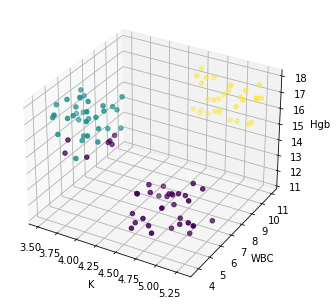

In [27]:
mutation_rates = [ 0.05, 0.1, 0.15]
mutation_scales = [ 2, 3]

best_rate_q2, best_scale_q2, best_result_q2 = genetic_algorithm_q2.run_with_different_mutations_params(mutation_rates, mutation_scales, 2)
print(len(set(best_result_q2)), 'clusters')
make_chart(EMR3d1, best_result_q2, variables1)


***
Seems like the error threshold we set (0.004) was too high as the best solution actually stopped as it reached the err threshold we provided the GA class - 0.004. Let's change it to 0.003 and run again with Elite = 2. 


(Note: We changed and re-ran the relevant cell, so the change is not reflected here)
***

Running GA... rate = 0.05, scale = 2
The population of the first generation: 
[[1. 0. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [4. 6. 4. ... 2. 3. 6.]
 [5. 0. 6. ... 5. 2. 0.]
 [1. 3. 6. ... 6. 1. 3.]]

Evolution:
Generation = 0 	Lowest error 0.239, highest fitness = 4.181
Generation = 200 	Lowest error 0.007, highest fitness = 134.577
Generation = 400 	Lowest error 0.004, highest fitness = 284.740
Generation = 600 	Lowest error 0.003, highest fitness = 308.165
200 generations without change. Stopping at generation 648

The population of the last generation: 
[[2. 0. 1. ... 0. 1. 1.]
 [2. 0. 1. ... 0. 1. 1.]
 [2. 0. 1. ... 0. 1. 1.]
 ...
 [2. 0. 1. ... 0. 1. 1.]
 [2. 0. 1. ... 0. 1. 1.]
 [2. 0. 1. ... 0. 1. 1.]]
0
Best solution:  [2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2.
 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0.
 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 1. 2. 0.
 1. 2. 0.

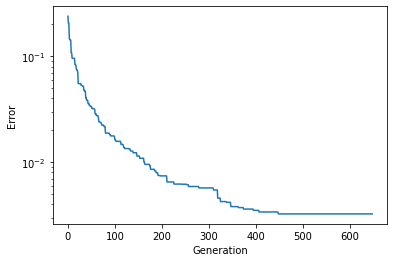

GA took 107.204 sec to run
3 clusters


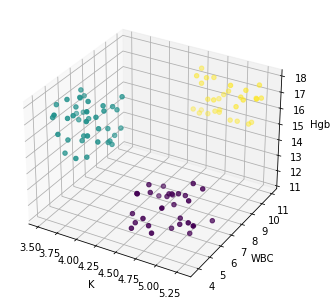

In [39]:
genetic_algorithm_q2.number_of_solutions = 600
genetic_algorithm_q2.number_of_parents = 300

genetic_algorithm_q2.elite = 2
_, _, _, best_solution_q2e  = genetic_algorithm_q2.run(best_rate_q2, best_scale_q2)
print(len(set(best_solution_q2e)), 'clusters')
make_chart(EMR3d1, best_solution_q2e, variables1)


***

Nice! We can see that the genetic algorithm was able to converge to 3 clean clusters. It stopped after 648 iterations / generations, but after 200 without any change, so actually it got to this solution after 448 generations. 
***

## Challenge 233: Reconstruct Image (Bonus)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [119]:
img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

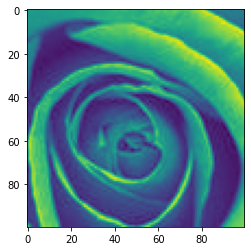

In [120]:
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [121]:
target = img[100:200,200:300,0]

In [122]:
target.shape
target = target.reshape(1, 100 * 100)
target

array([[134, 135, 137, ..., 194, 197, 200]], dtype=uint8)

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

***

Initialization will be random numbers 0-255. 
For fitenss, let's use the absolute difference between the pixels.

***

In [127]:

def init_function_q3(population_size, data): # data is not being used, just for compatability with other init functions
    return np.random.randint(low=0, high=256, size=population_size)


def fitness_function_3(target_img, pop):
    fitness = []
    for solution in range(len(pop)):
        error = np.sum(np.abs(pop[solution] - target_img))
        fitness.append(1 / error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness


# GA parameters
features = 100 * 100
number_of_solutions = 10
number_of_parents = 4
number_of_generations = 10000
stop_threshold = 1000

genetic_algorithm_q3 = GA(data=target,
                          fitness_function=fitness_function_3,
                          init_function=init_function_q3,
                          number_of_solutions=number_of_solutions,
                          size_of_solution=features,
                          number_of_parents=number_of_parents,
                          max_generations=number_of_generations,
                          stop_threshold = stop_threshold,
                          var_min=0,
                          var_max=256)




  0%|          | 0/2 [00:00<?, ?it/s]

Running GA: rate = 0.05, scale = 5, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:13<00:13, 13.44s/it]

GA took 13.444 sec to run
run 0: best fitness 0.000001, lowest error 845117.00 
Running GA: rate = 0.05, scale = 5, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 13.425 sec to run
run 1: best fitness 0.000001, lowest error 850097.00 
************************************************************
best solution = [ 12   2 150 ...   6  63   4]
************************************************************
rate 0.05, scale 5: best solution [  0 102   3 ...   0  17   9], err = 845117.000
Running GA: rate = 0.05, scale = 10, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:13<00:13, 13.30s/it]

GA took 13.296 sec to run
run 0: best fitness 0.000001, lowest error 776283.00 
Running GA: rate = 0.05, scale = 10, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 13.417 sec to run
run 1: best fitness 0.000001, lowest error 782854.00 
************************************************************
best solution = [ 62  30 108 ...  81   0 182]
************************************************************
rate 0.05, scale 10: best solution [57 54  8 ... 18 57 40], err = 776283.000
Running GA: rate = 0.05, scale = 20, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:13<00:13, 13.67s/it]

GA took 13.666 sec to run
run 0: best fitness 0.000001, lowest error 748380.00 
Running GA: rate = 0.05, scale = 20, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 13.557 sec to run
run 1: best fitness 0.000001, lowest error 753723.00 
************************************************************
best solution = [  4 215  47 ... 172  48 122]
************************************************************
rate 0.05, scale 20: best solution [189 105  81 ... 180   7  78], err = 748380.000
Running GA: rate = 0.1, scale = 5, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:14<00:14, 14.57s/it]

GA took 14.573 sec to run
run 0: best fitness 0.000001, lowest error 952451.00 
Running GA: rate = 0.1, scale = 5, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 14.661 sec to run
run 1: best fitness 0.000001, lowest error 953468.00 
************************************************************
best solution = [21  2  7 ...  2  3  6]
************************************************************
rate 0.1, scale 5: best solution [11 16  2 ...  5  2 18], err = 952451.000
Running GA: rate = 0.1, scale = 10, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:14<00:14, 14.50s/it]

GA took 14.501 sec to run
run 0: best fitness 0.000001, lowest error 803983.00 
Running GA: rate = 0.1, scale = 10, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 14.466 sec to run
run 1: best fitness 0.000001, lowest error 802640.00 
************************************************************
best solution = [ 8 14  0 ... 22  0 19]
************************************************************
rate 0.1, scale 10: best solution [ 8 14  0 ... 22  0 19], err = 802640.000
Running GA: rate = 0.1, scale = 20, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:14<00:14, 14.74s/it]

GA took 14.737 sec to run
run 0: best fitness 0.000001, lowest error 760739.00 
Running GA: rate = 0.1, scale = 20, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 14.606 sec to run
run 1: best fitness 0.000001, lowest error 758463.00 
************************************************************
best solution = [180  47  11 ...  85  17  25]
************************************************************
rate 0.1, scale 20: best solution [180  47  11 ...  85  17  25], err = 758463.000
Running GA: rate = 0.2, scale = 5, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:16<00:16, 16.06s/it]

GA took 16.059 sec to run
run 0: best fitness 0.000001, lowest error 960187.00 
Running GA: rate = 0.2, scale = 5, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 15.997 sec to run
run 1: best fitness 0.000001, lowest error 960591.00 
************************************************************
best solution = [ 1  1  1 ... 15  2 10]
************************************************************
rate 0.2, scale 5: best solution [ 0 12  8 ...  0 26  1], err = 960187.000
Running GA: rate = 0.2, scale = 10, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:16<00:16, 16.07s/it]

GA took 16.071 sec to run
run 0: best fitness 0.000001, lowest error 811171.00 
Running GA: rate = 0.2, scale = 10, solutions = 10, parents = 4, elite = 0, max generations = 10000


  0%|          | 0/2 [00:00<?, ?it/s]

GA took 16.192 sec to run
run 1: best fitness 0.000001, lowest error 808578.00 
************************************************************
best solution = [35 18 12 ...  4 24  9]
************************************************************
rate 0.2, scale 10: best solution [35 18 12 ...  4 24  9], err = 808578.000
Running GA: rate = 0.2, scale = 20, solutions = 10, parents = 4, elite = 0, max generations = 10000


 50%|█████     | 1/2 [00:16<00:16, 16.31s/it]

GA took 16.313 sec to run
run 0: best fitness 0.000001, lowest error 759967.00 
Running GA: rate = 0.2, scale = 20, solutions = 10, parents = 4, elite = 0, max generations = 10000


100%|██████████| 2/2 [00:32<00:00, 16.30s/it]

GA took 16.291 sec to run
run 1: best fitness 0.000001, lowest error 758886.00 
************************************************************
best solution = [137  74  91 ...  55  53 177]
************************************************************
rate 0.2, scale 20: best solution [137  74  91 ...  55  53 177], err = 758886.000
(0.05, 5) : [array([  0, 102,   3, ...,   0,  17,   9]), 845117.0]
(0.05, 10) : [array([57, 54,  8, ..., 18, 57, 40]), 776283.0]
(0.05, 20) : [array([189, 105,  81, ..., 180,   7,  78]), 748380.0]
(0.1, 5) : [array([11, 16,  2, ...,  5,  2, 18]), 952451.0]
(0.1, 10) : [array([ 8, 14,  0, ..., 22,  0, 19]), 802640.0]
(0.1, 20) : [array([180,  47,  11, ...,  85,  17,  25]), 758463.0]
(0.2, 5) : [array([ 0, 12,  8, ...,  0, 26,  1]), 960187.0]
(0.2, 10) : [array([35, 18, 12, ...,  4, 24,  9]), 808578.0]
(0.2, 20) : [array([137,  74,  91, ...,  55,  53, 177]), 758886.0000000001]
best results:
 0.05 20 [189 105  81 ... 180   7  78]


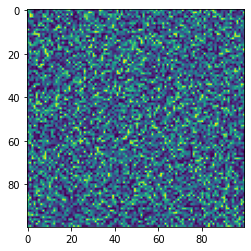

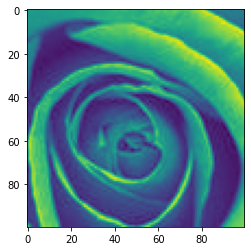

In [129]:
# let's try to make it faster with less iterations and solutions to see what are the best mutation params

mutation_rates = [0.05, 0.1, 0.2]
mutation_scales = [5, 10, 20]

best_rate_q3, best_scale_q3, best_result_q3 = genetic_algorithm_q3.run_with_different_mutations_params(mutation_rates, mutation_scales, 2)

plt.imshow(best_result_q3.reshape(100, 100))

fig = plt.figure()
plt.imshow(target.reshape(100, 100))

***
Let's use the mutation params we got and test for population size and num of parents.
***

In [130]:
# try different ratio of parents and population sizes
genetic_algorithm_q3.max_generations = 10000
genetic_algorithm_q3.elite = 0


ratio_of_parents = [ 0.35, 0.5]
number_of_solutions = [10, 20, 50]

best_parent_ratio_q3, best_sol_num_q3, best_sol_q3 = genetic_algorithm_q3.run_with_different_population_params(best_rate_q3, best_scale_q3, ratio_of_parents, number_of_solutions, 2)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running GA: rate = 0.05, scale = 20, solutions = 10, parents = 3, elite = 0, max generations = 10000




 50%|█████     | 1/2 [00:15<00:15, 15.46s/it]

GA took 15.463 sec to run
run 0: best fitness 0.000001, lowest error 762749.00 
Running GA: rate = 0.05, scale = 20, solutions = 10, parents = 3, elite = 0, max generations = 10000




100%|██████████| 2/2 [00:30<00:00, 15.39s/it]

 50%|█████     | 1/2 [00:30<00:30, 30.79s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 15.321 sec to run
run 1: best fitness 0.000001, lowest error 765117.00 
************************************************************
best solution = [63 86 79 ... 67  0 90]
************************************************************
ratio parents 0.35, number_of_solutions 10: best solution [  0 139  88 ...  59 210 181], err = 762749.000
Running GA: rate = 0.05, scale = 20, solutions = 10, parents = 5, elite = 0, max generations = 10000




 50%|█████     | 1/2 [00:12<00:12, 12.07s/it]

GA took 12.068 sec to run
run 0: best fitness 0.000001, lowest error 766015.00 
Running GA: rate = 0.05, scale = 20, solutions = 10, parents = 5, elite = 0, max generations = 10000




100%|██████████| 2/2 [00:24<00:00, 12.10s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 12.128 sec to run
run 1: best fitness 0.000001, lowest error 759691.00 
************************************************************
best solution = [ 97  86  28 ...   0 136  44]
************************************************************
ratio parents 0.5, number_of_solutions 10: best solution [ 97  86  28 ...   0 136  44], err = 759691.000
Running GA: rate = 0.05, scale = 20, solutions = 20, parents = 7, elite = 0, max generations = 10000




 50%|█████     | 1/2 [00:29<00:29, 29.85s/it]

GA took 29.844 sec to run
run 0: best fitness 0.000001, lowest error 757594.00 
Running GA: rate = 0.05, scale = 20, solutions = 20, parents = 7, elite = 0, max generations = 10000




100%|██████████| 2/2 [00:59<00:00, 29.56s/it]

 50%|█████     | 1/2 [00:59<00:59, 59.12s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 29.274 sec to run
run 1: best fitness 0.000001, lowest error 760898.00 
************************************************************
best solution = [ 88  36  57 ...  52 172  49]
************************************************************
ratio parents 0.35, number_of_solutions 20: best solution [171 186  40 ...  74  22  19], err = 757594.000
Running GA: rate = 0.05, scale = 20, solutions = 20, parents = 10, elite = 0, max generations = 10000




 50%|█████     | 1/2 [00:23<00:23, 23.19s/it]

GA took 23.190 sec to run
run 0: best fitness 0.000001, lowest error 766286.00 
Running GA: rate = 0.05, scale = 20, solutions = 20, parents = 10, elite = 0, max generations = 10000




100%|██████████| 2/2 [00:46<00:00, 23.14s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 23.080 sec to run
run 1: best fitness 0.000001, lowest error 759317.00 
************************************************************
best solution = [ 76 256  44 ... 125 207   9]
************************************************************
ratio parents 0.5, number_of_solutions 20: best solution [ 76 256  44 ... 125 207   9], err = 759317.000
Running GA: rate = 0.05, scale = 20, solutions = 50, parents = 17, elite = 0, max generations = 10000




 50%|█████     | 1/2 [01:16<01:16, 76.34s/it]

GA took 76.338 sec to run
run 0: best fitness 0.000001, lowest error 761904.00 
Running GA: rate = 0.05, scale = 20, solutions = 50, parents = 17, elite = 0, max generations = 10000




100%|██████████| 2/2 [02:31<00:00, 75.75s/it]

 50%|█████     | 1/2 [02:31<02:31, 151.50s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

GA took 75.151 sec to run
run 1: best fitness 0.000001, lowest error 762054.00 
************************************************************
best solution = [252 229   0 ...  70 205   0]
************************************************************
ratio parents 0.35, number_of_solutions 50: best solution [102   0  52 ...  82   0  27], err = 761904.000
Running GA: rate = 0.05, scale = 20, solutions = 50, parents = 25, elite = 0, max generations = 10000




 50%|█████     | 1/2 [00:57<00:57, 57.54s/it]

GA took 57.536 sec to run
run 0: best fitness 0.000001, lowest error 750828.00 
Running GA: rate = 0.05, scale = 20, solutions = 50, parents = 25, elite = 0, max generations = 10000




100%|██████████| 2/2 [01:55<00:00, 57.53s/it]

100%|██████████| 3/3 [07:06<00:00, 142.32s/it]

GA took 57.528 sec to run
run 1: best fitness 0.000001, lowest error 764808.00 
************************************************************
best solution = [111   0 113 ...  99  27 178]
************************************************************
ratio parents 0.5, number_of_solutions 50: best solution [ 95 175  53 ... 228 237 227], err = 750828.000
(0.35, 10) : [array([  0, 139,  88, ...,  59, 210, 181]), 762749.0]
(0.5, 10) : [array([ 97,  86,  28, ...,   0, 136,  44]), 759691.0]
(0.35, 20) : [array([171, 186,  40, ...,  74,  22,  19]), 757594.0]
(0.5, 20) : [array([ 76, 256,  44, ..., 125, 207,   9]), 759317.0]
(0.35, 50) : [array([102,   0,  52, ...,  82,   0,  27]), 761904.0]
(0.5, 50) : [array([ 95, 175,  53, ..., 228, 237, 227]), 750828.0]
best results:
 0.5 50 [ 95 175  53 ... 228 237 227]


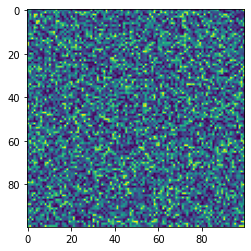

In [131]:

plt.imshow(best_sol_q3.reshape(100, 100))


***
Let's use all the parameters we got. As we have a lot of features - let's set a high number of generations to allow the algorithm enough generations to converge towards the correct solution 
***

running with Elite = 2
Running GA: rate = 0.05, scale = 20, solutions = 50, parents = 25, elite = 2, max generations = 50000
The population of the first generation: 
[[ 62   3  21 ...  11  28  68]
 [  0 251 180 ... 230 120  40]
 [ 45  69  75 ...   9 202 104]
 ...
 [ 19 189 113 ... 165 125 224]
 [170 241 166 ... 215 195  62]
 [214 250 102 ... 129 168 161]]

Evolution:
Generation = 0 	Lowest error 787953.000, highest fitness = 0.000
Generation = 2500 	Lowest error 615688.000, highest fitness = 0.000
Generation = 5000 	Lowest error 554420.000, highest fitness = 0.000
Generation = 7500 	Lowest error 516147.000, highest fitness = 0.000
Generation = 10000 	Lowest error 498580.000, highest fitness = 0.000
Generation = 12500 	Lowest error 483893.000, highest fitness = 0.000
Generation = 15000 	Lowest error 471635.000, highest fitness = 0.000
Generation = 17500 	Lowest error 465986.000, highest fitness = 0.000
Generation = 20000 	Lowest error 460206.000, highest fitness = 0.000
Generation = 225

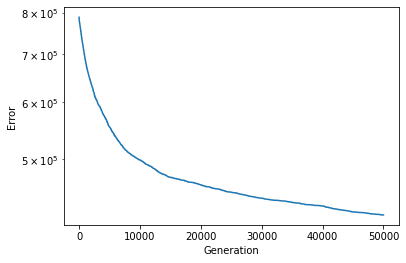

GA took 317.411 sec to run


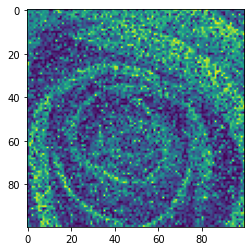

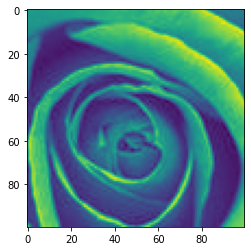

In [132]:
genetic_algorithm_q3.number_of_solutions = best_sol_num_q3
genetic_algorithm_q3.number_of_parents =  int(best_parent_ratio_q3 * best_sol_num_q3)
genetic_algorithm_q3.max_generations = 50000

genetic_algorithm_q3.uniform_crossover = False
elite = 2
print(f'running with Elite = {elite}')
genetic_algorithm_q3.elite = elite

_, _, _, best_solution = genetic_algorithm_q3.run(best_rate_q3, best_scale_q3)

plt.imshow(best_solution.reshape(100, 100))

fig = plt.figure()
plt.imshow(target.reshape(100, 100))

***

It looks like we're in the right direction. The error keeps going down but seems like we stopped too early. Let's increase the number of generations.
***

Running GA: rate = 0.05, scale = 20, solutions = 50, parents = 25, elite = 2, max generations = 1000000
The population of the first generation: 
[[ 65 229 245 ... 141  81  42]
 [119 222  31 ...   8  73 194]
 [137 132  67 ... 141 162  36]
 ...
 [111 198  88 ...  73 199  21]
 [182 212   7 ...  46  63 248]
 [246  52 251 ... 200 168 102]]

Evolution:
Generation = 0 	Lowest error 789121.000, highest fitness = 0.000
Generation = 50000 	Lowest error 419073.000, highest fitness = 0.000
1000 generations without change. Stopping at generation 57046

The population of the last generation: 
[[130 112  82 ... 148  78 215]
 [130 112  82 ... 148  78 215]
 [123 112  82 ... 148  86 215]
 ...
 [130 112  82 ... 146  60 215]
 [130 112  82 ... 143  78 215]
 [130 112  82 ... 143  78 215]]
0
Best solution:  [130 112  82 ... 148  78 215]


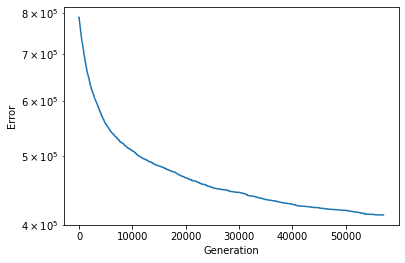

GA took 341.622 sec to run


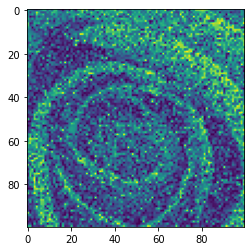

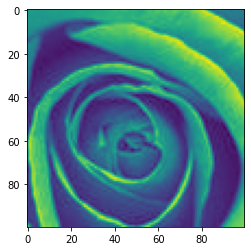

In [133]:
genetic_algorithm_q3.max_generations = 1000000

_, _, _, best_solution = genetic_algorithm_q3.run(best_rate_q3, best_scale_q3)

plt.imshow(best_solution.reshape(100, 100))

fig = plt.figure()
plt.imshow(target.reshape(100, 100))

***

Getting better, but the error is still pretty high. We can see the convergence is slow and the algorithm hits a local minima. Let's try with uniform crossover to increase the diversity with smaller mutation rate. 
***

Running GA: rate = 0.05, scale = 20, solutions = 50, parents = 25, elite = 2, max generations = 500000
The population of the first generation: 
[[ 51  56 158 ...  18 121 111]
 [187 119 130 ... 254 116  67]
 [ 66   9  90 ... 175   5  73]
 ...
 [232 224  94 ... 215 179 241]
 [146 170  24 ... 156 217  65]
 [253  80 189 ... 224 144 163]]

Evolution:
Generation = 0 	Lowest error 788817.000, highest fitness = 0.000
Generation = 25000 	Lowest error 441498.000, highest fitness = 0.000
Generation = 50000 	Lowest error 412265.000, highest fitness = 0.000
Generation = 75000 	Lowest error 397104.000, highest fitness = 0.000
Generation = 100000 	Lowest error 387651.000, highest fitness = 0.000
1000 generations without change. Stopping at generation 114525

The population of the last generation: 
[[ 65 207 227 ... 175 197 160]
 [ 65 207 227 ... 175 197 160]
 [ 65 207 227 ... 175 221 160]
 ...
 [ 65 207 227 ... 181 174 160]
 [ 65 207 227 ... 175 197 149]
 [ 65 200 227 ... 181 174 160]]
0
Best solutio

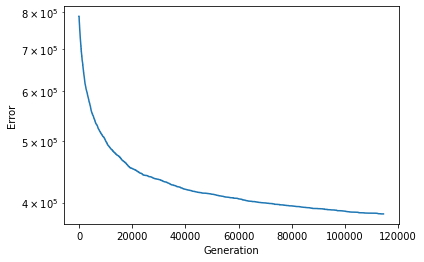

GA took 686.673 sec to run


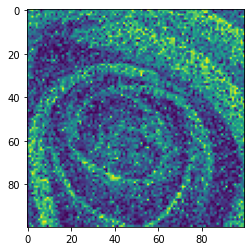

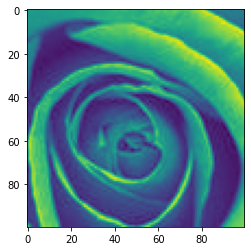

In [134]:
genetic_algorithm_q3.max_generations = 500000
genetic_algorithm_q3.uniform_crossover = True
genetic_algorithm_q3.elite = 2

_, _, _, best_solution = genetic_algorithm_q3.run(best_rate_q3, best_scale_q3)

plt.imshow(best_solution.reshape(100, 100))
fig = plt.figure()
plt.imshow(target.reshape(100, 100))

***
This is an improvement with regards to the previous run (error is 387,651 vs 419,073). 
***